Name : Biyon Fernando

Index number : 190178J

Text(0.5, 1.0, 'Transformed')

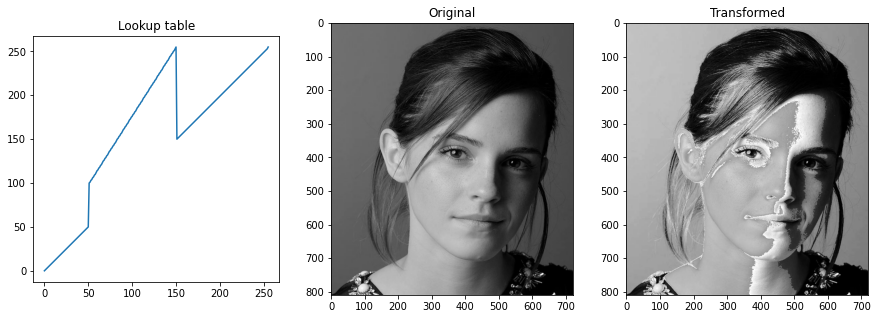

In [2]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'emma_gray.jpg')
assert img is not None

l1 = np.linspace(0,50,51)
l2 = np.linspace(100,255,100)
l3 = np.linspace(150,255,105)

lt = np.concatenate((l1,l2,l3), axis = 0).astype(np.uint8)

img2 = cv.LUT(img, lt)

fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].plot(lt)
ax[0].set_aspect('equal')
ax[0].set_title('Lookup table')
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].set_title('Original')
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title('Transformed')

Text(0.5, 1.0, 'Lookup table')

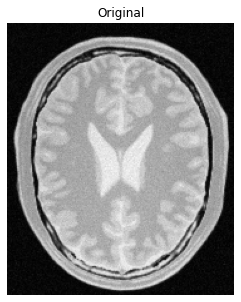

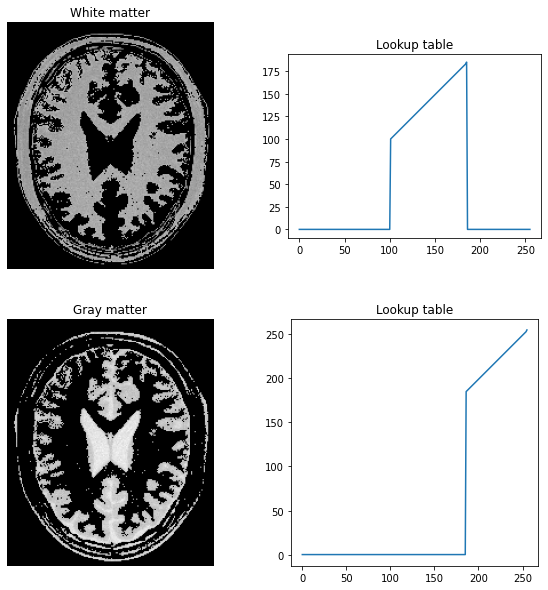

In [39]:
img = cv.imread(r'brain_proton_density_slice.png')
assert img is not None


treshold = 185

l1 = np.zeros(treshold+1)
l2 = np.linspace(treshold,255,255-treshold)

# l1 = np.linspace(0,150,5)
# l2 = np.linspace(150,185,18)


lt1 = np.concatenate((l1,l2), axis = 0).astype(np.uint8)

l0 = np.zeros(100+1)
l3 = np.linspace(100,treshold, treshold-100)
l4 = np.zeros(255-treshold)

lt2 = np.concatenate((l0,l3,l4), axis = 0).astype(np.uint8)


# ideal_val_g = 160
# g1 = np.linspace(0,5,ideal_val_g)
# g2 = np.linspace(5,250,60)
# g3 = np.linspace(250,255,256-60-160)
# lt1 = np.concatenate((g1,g2,g3),axis=0).astype(np.uint8)


# ideal_val_w = 150
# w1 = np.linspace(0,5,ideal_val_w)
# w2 = np.linspace(5,184,38)
# w3 = np.linspace(184,255,256-150-38)
# lt2 = np.concatenate((w1,w2,w3),axis=0).astype(np.uint8)


img2 = cv.LUT(img, lt1)

img3 = cv.LUT(img, lt2)

fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax.set_title('Original')
ax.axis("off")


fig1, ax1 = plt.subplots(2,2,figsize = (10,10))

ax1[0][0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
ax1[0][0].set_title('White matter')
ax1[0][0].axis("off")

ax1[0][1].plot(lt2)
ax1[0][1].set_aspect('equal')
ax1[0][1].set_title('Lookup table')

ax1[1][0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax1[1][0].set_title('Gray matter')
ax1[1][0].axis("off")

ax1[1][1].plot(lt1)
ax1[1][1].set_aspect('equal')
ax1[1][1].set_title('Lookup table')


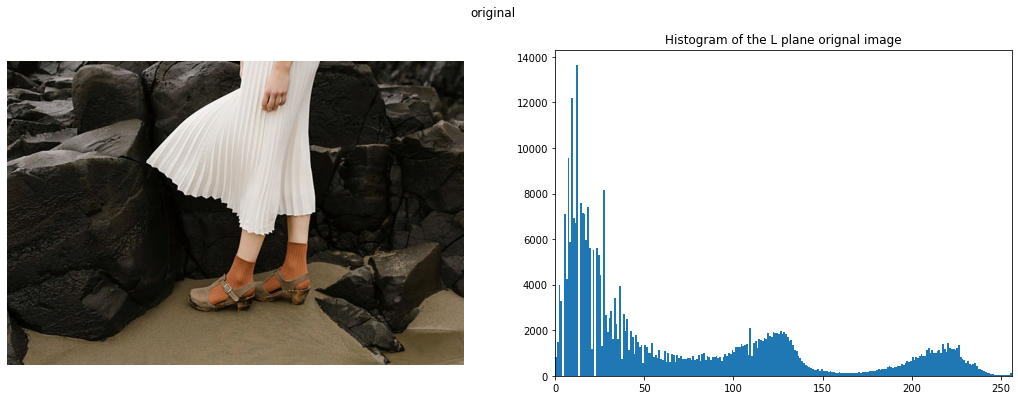

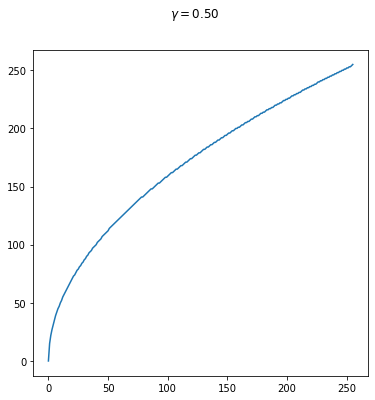

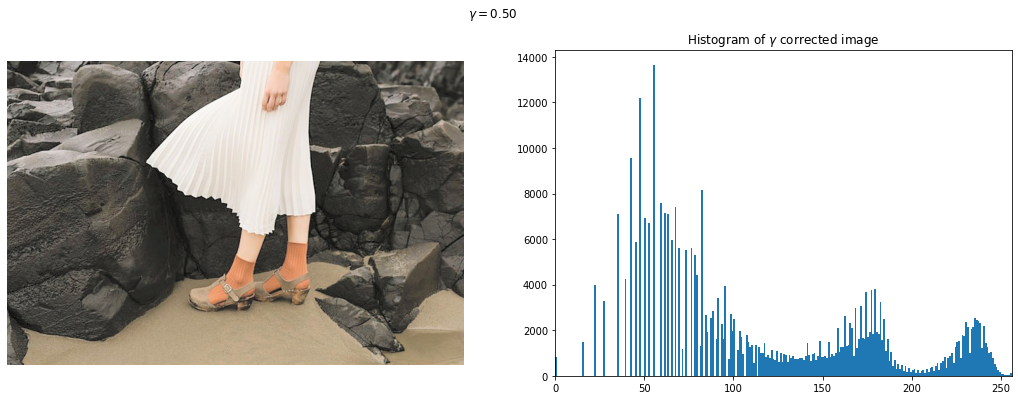

In [44]:
img0 = cv.imread(r'highlights_and_shadows.jpg')
assert img0 is not None


img1 = cv.cvtColor(img0, cv.COLOR_BGR2Lab)

L = img1[:,:,0]
a = img1[:,:,1]
b = img1[:,:,2]



hist_org = cv.calcHist([L], [0], None, [256], [0,256])


fig, ax = plt.subplots(1,2,figsize = (18,6))
fig.suptitle('original')
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_Lab2RGB))
ax[0].axis('off')
#ax[1].plot(hist_org)
ax[1].set_xlim([0, 256])
ax[1].title.set_text('Histogram of the L plane orignal image')
ax[1].hist(L.flatten(), 256, [0, 256])



gamma = 0.5

lt = np.array([((i/255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)

fig, ax = plt.subplots(figsize = (6,6))
fig.suptitle('$ \gamma = %.2f$'%gamma)
ax.plot(lt)

L2 = cv.LUT(L, lt)

#print(L[0][0],L2[0][0])

img1[:,:,0] = L2

#print(L2.shape, type(lt))

hist = cv.calcHist([L2], [0], None, [256], [0,256]) 

fig, ax = plt.subplots(1,2,figsize = (18,6))
fig.suptitle('$ \gamma = %.2f$'%gamma)

# ax[0].set_aspect('equal')
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_Lab2RGB))
ax[0].axis('off')
ax[1].set_xlim([0, 256])
ax[1].hist(L.flatten(), 256, [0, 256])
ax[1].title.set_text('Histogram of $\gamma$ corrected image')

(-0.5, 499.5, 499.5, -0.5)

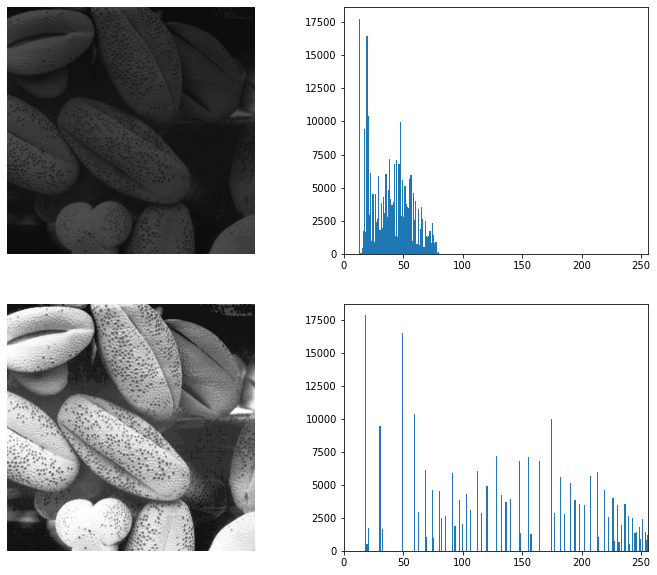

In [42]:
img0 = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert img0 is not None

def grayImgEqualizingLookUp(img):
    M,N = img.shape
    L = 256 # 256 is used as data type of pixel value are in uint8

    hist = cv.calcHist([img], [0], None, [256], [0,256]) 

    lt = []
    sum = 0
    for nk in hist:
        sum+=nk[0]
        lt.append(round((sum*(L-1))/(M*N)))
    return np.array(lt)

#hist_org = cv.calcHist([img0], [0], None, [256], [0,256])

lt =grayImgEqualizingLookUp(img0)

#print(lt)
img1 = cv.LUT(img0, lt)

    
#hist = cv.calcHist([img1.astype(np.uint8)], [0], None, [256], [0,256]) 
#hist = np.histogram(img1,bins='auto')
#print(hist)

fig, ax = plt.subplots(2,2,figsize = (12,10))


ax[0][0].imshow(cv.cvtColor(img0, cv.COLOR_GRAY2RGB))
ax[0][0].axis('off')
ax[0][1].set_xlim([0, 256])
ax[0][1].hist(img0.flatten(), 256, [0, 256])
ax[1][0].imshow(cv.cvtColor(img1.astype(np.uint8), cv.COLOR_GRAY2RGB))
ax[1][1].set_xlim([0, 256])
ax[1][1].hist(img1.astype(np.uint8).flatten(), 256, [0, 256])
ax[1][0].axis('off')



In [16]:
def nearestNeighborZoom(img, s):

    rows,cols, nChannels = int(img.shape[0]*s), int(img.shape[1]*s), int(img.shape[2])
    imgTemp = np.zeros((rows,cols, nChannels))

    for i in range(rows):
        for j in range(cols):
            
            x = min(img.shape[0]-1, int(np.round(i/s)))
            y = min(img.shape[1]-1, int(np.round(j/s)))
            
            imgTemp[i,j,:]=img[x,y,:]
            
    return imgTemp

In [34]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'a1q5images/im02small.png').astype('uint8')
assert img is not None

# fig, ax = plt.subplots(figsize = (18,6))
# ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
# ax.axis('off')

print(img[0][0],img[1][1],img[0][1],img[1][0])

img1 = nearestNeighborZoom(img, 4).astype('uint8')

print(img1[0][0])
print("------#######")


cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img)
cv.waitKey(0)
cv.imshow("Image",img1)
cv.waitKey(0)
cv.destroyAllWindows()



img2 = cv.imread(r'a1q5images/im02.png').astype('uint8')

print(img2[0][0])
error = np.sqrt(np.sum((img1-img2)**2)/(img2.shape[0]*img2.shape[1]*3))

print(error)

# fig, ax = plt.subplots(figsize = (18,6))
# ax.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
# ax.axis('off')




[51 62 84] [52 63 84] [51 62 84] [51 62 82]
(300, 480, 3)
1200 1920
[51 62 84]
------#######
[52 63 85]
4.097922756731621


In [35]:
def bilinearInterpolationZoom(img,s):

    rowsO, colsO = img.shape[0],img.shape[1]
    rows,cols, nChannels = int(img.shape[0]*s), int(img.shape[1]*s), int(img.shape[2])

    imgTemp = np.zeros((rows,cols, nChannels))

    for i in range(rows):
        for j in range(cols):
            
            x,y =i/s,j/s
            x0,y0,x1,y1 = np.floor(x),np.floor(y),np.ceil(x),np.ceil(y)
            x0,y0,x1,y1 = min(rowsO-1, int(x0)), min(colsO-1, int(y0)), min(rowsO-1, int(x1)), min(rowsO, int(y1))
            px0y0,px0y1,px1y0,px1y1 = img[x0,y0,:],img[x0,y1,:],img[x1,y0,:],img[x1,y1,:]

            pxy=np.zeros(nChannels)
            
            if (x0!=x1 and y0!=y1):
                py0 = px0y0+(px1y0-px0y0)*(x-x0)/(x1-x0)
                py1 = px0y1+(px1y1-px0y1)*(x-x0)/(x1-x0)
                pxy = py0+(py1-py0)*(y-y0)/(y1-y0)
            elif (x0!=x1 or y0!=y1):
                if(x0!=x1):
                    pxy = px0y0+(px1y0-px0y0)*(x-x0)/(x1-x0)
                
                else:
                    pxy = px0y0+(px0y1-px0y0)*(y-y0)/(y1-y0)

            
            else:
                pxy = px0y0
            
            
            imgTemp[i,j,:]=np.round(pxy)
    return imgTemp   

In [36]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'a1q5images/im02small.png').astype('uint8')
assert img is not None

# fig, ax = plt.subplots(figsize = (18,6))
# ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
# ax.axis('off')

print(type(img[0,0,0]))
img1 = bilinearInterpolationZoom(img.astype('float32'),4).astype('uint8')

print(np.max(img1),np.min(img1))



cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img)
cv.waitKey(0)
cv.imshow("Image",img1)
cv.waitKey(0)
cv.destroyAllWindows()
print(img1.shape)
print("------#######")

img2 = cv.imread(r'a1q5images/im02.png').astype('uint8')

print(img2.shape)
error = np.sqrt(np.sum((img1-img2)**2)/(img2.shape[0]*img2.shape[1]*3))

print(error)


<class 'numpy.uint8'>
255 8
(1200, 1920, 3)
------#######
(1200, 1920, 3)
4.015235975175381


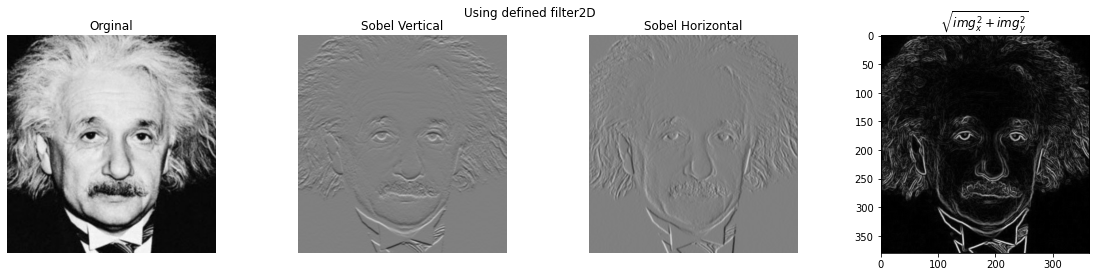

In [32]:
img = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype('float32')
assert img is not None

xDir =  np.array([ ( -1 , -2 , -1 ) , ( 0 , 0 , 0 ) , ( 1 , 2 , 1 ) ] , dtype = np.float32 )
yDir =  np.array([ ( -1 , 0 , 1 ) , ( -2 , 0 , 2 ) , ( -1 , 0 , 1 ) ] , dtype = np.float32 )

#print(img)
img2 = cv.filter2D(img ,-1 ,xDir)
#print(img2)
img3 = cv.filter2D(img ,-1 ,yDir)

img4= np.sqrt(img2**2 + img3**2) #np.power(np.power(img2,2)+np.power(img3,2),0.5)

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using defined filter2D')
ax[0].set_title('Orginal')
ax[0].imshow(img, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img2, cmap = 'gray',vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img3, cmap = 'gray',vmin =-1020, vmax=1020)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img4, cmap = 'gray')

for  i in range(3):
    ax[i].axis('off')

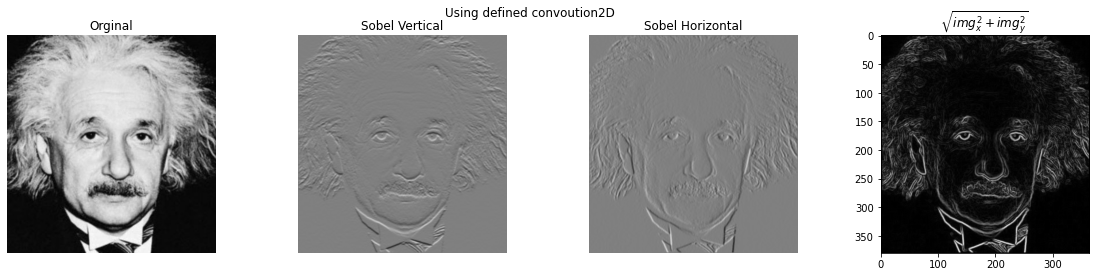

In [29]:
img = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype('float32')
assert img is not None

xDir =  np.array([ ( -1 , -2 , -1 ) , ( 0 , 0 , 0 ) , ( 1 , 2 , 1 ) ] , dtype = np.float32 )
yDir =  np.array([ ( -1 , 0 , 1 ) , ( -2 , 0 , 2 ) , ( -1 , 0 , 1 ) ] , dtype = np.float32 )

def convoution2D(img, kernal):
    ksizex,ksizey = kernal.shape
    M,N = img.shape
    #print(ksizex,ksizey)
    #print(M,N)

    
    imgNew = np.zeros(img.shape)

    for i in range(M):
        for j in range(N):
            if (i<np.floor(ksizex/2) or j<np.floor(ksizey/2) or j> N - np.floor(ksizey/2) -1 or i> M - np.floor(ksizex/2)-1):
                imgNew[i][j]=0
            else:
                #print(img[i-int(np.floor(ksizex/2)):i+int(np.floor(ksizex/2))+1 , j-int(np.floor(ksizey/2)):j+int(np.floor(ksizey/2))+1])
                imgNew[i][j] = sum(sum(kernal*img[i-int(np.floor(ksizex/2)):i+int(np.floor(ksizex/2))+1 , j-int(np.floor(ksizey/2)):j+int(np.floor(ksizey/2))+1]))

    return imgNew

#print(img)

img2 = convoution2D(img, xDir)

#print(img2)
img3 = convoution2D(img, yDir)

img4= np.sqrt(img2**2 + img3**2) #np.power(np.power(img2,2)+np.power(img3,2),0.5)

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using defined convoution2D')
ax[0].set_title('Orginal')
ax[0].imshow(img, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img2, cmap = 'gray',vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img3, cmap = 'gray',vmin =-1020, vmax=1020)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img4, cmap = 'gray')

for  i in range(3):
    ax[i].axis('off')

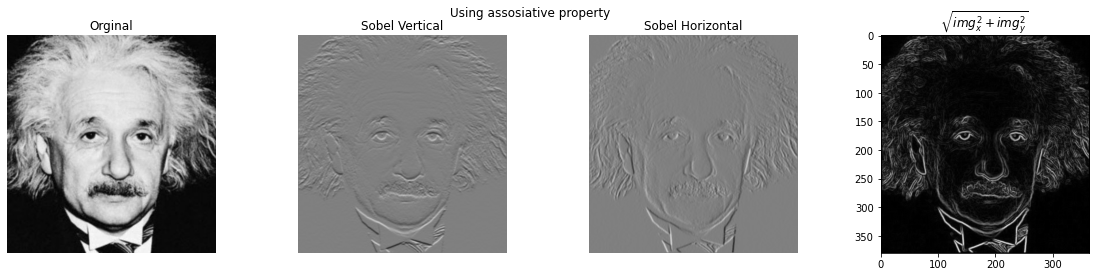

In [31]:
A = np.array([[1,2,1]])
B = np.array([[-1],[0],[1]])


img2 =convoution2D(convoution2D(img, A),B)

img3 = convoution2D(convoution2D(img, B.T),A.T)

img4= np.sqrt(img2**2 + img3**2) #np.power(np.power(img2,2)+np.power(img3,2),0.5)

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using assosiative property')
ax[0].set_title('Orginal')
ax[0].imshow(img, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img2, cmap = 'gray',vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img3, cmap = 'gray',vmin =-1020, vmax=1020)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img4, cmap = 'gray')

for  i in range(3):
    ax[i].axis('off')

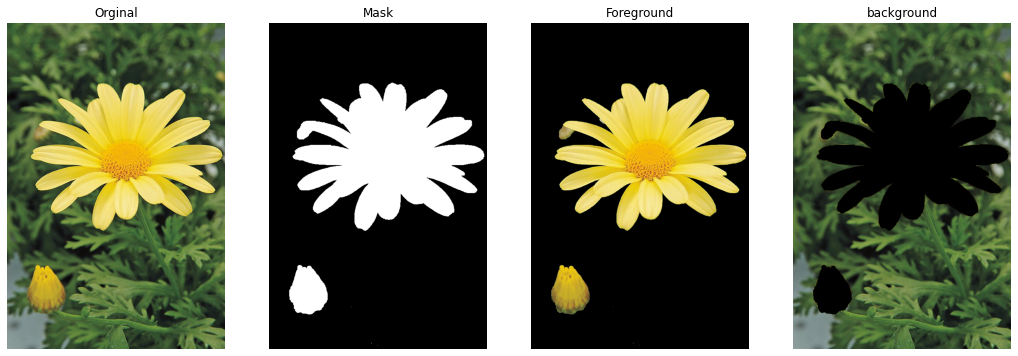

In [46]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('daisy.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,550,800)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
imgMasked = img*mask2[:,:,np.newaxis]

imgBack = img - imgMasked


fig, ax = plt.subplots(1,4,figsize = (18,6))
# fig.suptitle('Using assosiative property')
ax[0].set_title('Orginal')
ax[0].imshow(cv.cvtColor(img.astype(np.uint8), cv.COLOR_BGR2RGB))

ax[1].set_title('Mask')
ax[1].imshow(mask2, cmap = 'gray')

ax[2].set_title('Foreground')
ax[2].imshow(cv.cvtColor(imgMasked.astype(np.uint8), cv.COLOR_BGR2RGB))

ax[3].set_title('background')
ax[3].imshow(cv.cvtColor(imgBack.astype(np.uint8), cv.COLOR_BGR2RGB))

for  i in range(4):
    ax[i].axis('off')

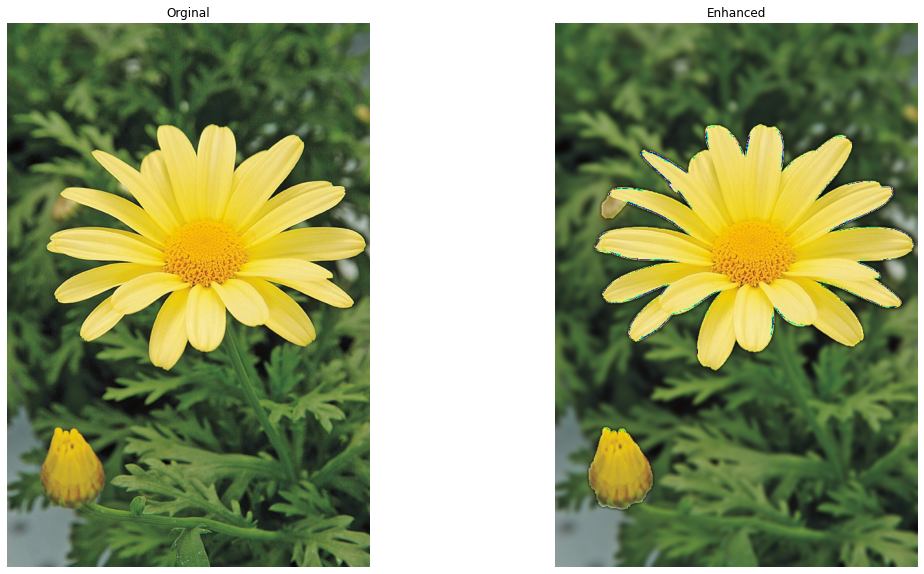

In [49]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('daisy.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,550,800)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
imgMasked = img*mask2[:,:,np.newaxis]

imgBack = img - imgMasked

ksize = 9

sigma =4

imgBackBlured= cv.GaussianBlur(imgBack, (ksize,ksize), sigma)

imgEnhanced = imgMasked+imgBackBlured

fig, ax = plt.subplots(1,2,figsize = (18,10))
# fig.suptitle('Using assosiative property')
ax[0].set_title('Orginal')
ax[0].imshow(cv.cvtColor(img.astype(np.uint8), cv.COLOR_BGR2RGB))

ax[1].set_title('Enhanced')
ax[1].imshow(cv.cvtColor(imgEnhanced.astype(np.uint8), cv.COLOR_BGR2RGB))


for  i in range(2):
    ax[i].axis('off')



In [17]:
k = np.array([[1,2,3],[3,2,1]])
k1 = np.array([[1,2,3],[3,2,1]])
sum(sum(k*k1))
k
print(sum(sum(k[0:1,0:2])))

3
